In [698]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.model_selection
import sklearn.ensemble

In [699]:
TSL = pd.read_csv(r"C:\Users\Tense\Documents\Flatiron\Phase1\NYC_DS_010625\Phase 3 Project 3\Pump it Up Data Mining the Water Table\Training set labels.csv")
TSL.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [700]:
TSV = pd.read_csv(r"C:\Users\Tense\Documents\Flatiron\Phase1\NYC_DS_010625\Phase 3 Project 3\Pump it Up Data Mining the Water Table\Training set values.csv")
TSV.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [701]:
merged_TSV = TSV.merge(TSL[['id', 'status_group']], on='id', how='left')
merged_TSV.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [702]:
TestV = pd.read_csv(r"C:\Users\Tense\Documents\Flatiron\Phase1\NYC_DS_010625\Phase 3 Project 3\Pump it Up Data Mining the Water Table\Test set values.csv")
TestV.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [703]:
full_df = pd.concat([merged_TSV, TestV])
full_df 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,NaN


Get rid of duplicates

In [704]:
full_df = full_df.drop(columns=['num_private','waterpoint_type', 'source_type', 'quantity_group', 'extraction_type_group','wpt_name', 'quality_group', 'payment','source_class','extraction_type_class','management_group','permit'])
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,Roman,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,NaN,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,Nyumba ya mungu pipe scheme,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,NaN,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,NaN,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [705]:
status_mapping = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
full_df['status_group'] = full_df['status_group'].map(status_mapping)
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,Roman,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,1.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,NaN,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,Nyumba ya mungu pipe scheme,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,1.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,NaN,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,0.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,NaN,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1.0


In [706]:
full_df = full_df.drop_duplicates()
full_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,Roman,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,1.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,NaN,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,Nyumba ya mungu pipe scheme,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,1.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,NaN,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,0.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,NaN,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Wami / Ruvu,Yombo,...,Bagamoyo wate,1988,mono,vwc,never pay,soft,enough,river,communal standpipe,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Pangani,Mkondoa,...,NaN,1994,nira/tanira,vwc,annually,salty,insufficient,shallow well,hand pump,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Internal,Juhudi,...,NaN,2010,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Lake Nyasa,Namakinga B,...,Mradi wa maji wa maposeni,2009,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,NaN


In [707]:
unique_population_values = full_df['population'].unique()
unique_population_values.sort()
print(unique_population_values)

[    0     1     2 ... 11469 15300 30500]


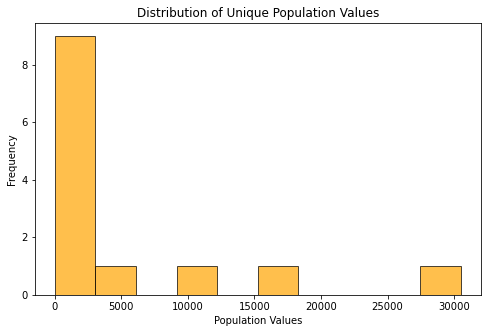

In [708]:
import matplotlib.pyplot as plt

unique_population_values = [0, 1, 2, 5, 10, 50, 100, 500, 1000, 5000, 11469, 15300, 30500]
plt.figure(figsize=(8, 5))
plt.hist(unique_population_values, bins=10, edgecolor='black', color='orange', alpha=0.7)

plt.xlabel("Population Values")
plt.ylabel("Frequency")
plt.title("Distribution of Unique Population Values")
plt.show()


In [709]:
full_df['log_population'] = np.log1p(full_df['population'])
print(full_df[['population', 'log_population']].head())


   population  log_population
0         109        4.700480
1         280        5.638355
2         250        5.525453
3          58        4.077537
4           0        0.000000


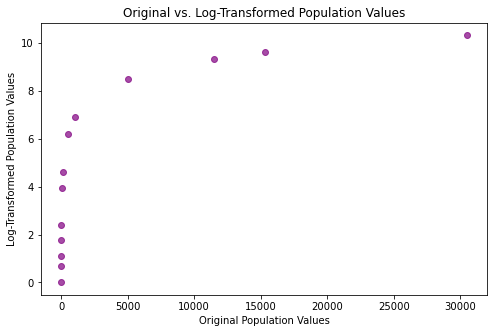

In [710]:
unique_population_values = np.array([0, 1, 2, 5, 10, 50, 100, 500, 1000, 5000, 11469, 15300, 30500])
log_population_values = np.log1p(unique_population_values)

plt.figure(figsize=(8, 5))
plt.scatter(unique_population_values, log_population_values, alpha=0.7, color='purple')

plt.xlabel("Original Population Values")
plt.ylabel("Log-Transformed Population Values")
plt.title("Original vs. Log-Transformed Population Values")

plt.show()


In [711]:
amount_tsh_values = full_df['amount_tsh'].unique()
amount_tsh_values.sort()
amount_tsh_values

array([0.00e+00, 2.00e-01, 2.50e-01, 5.00e-01, 1.00e+00, 2.00e+00,
       3.00e+00, 5.00e+00, 6.00e+00, 7.00e+00, 9.00e+00, 1.00e+01,
       1.20e+01, 1.50e+01, 2.00e+01, 2.50e+01, 2.60e+01, 3.00e+01,
       3.30e+01, 3.50e+01, 4.00e+01, 5.00e+01, 5.30e+01, 5.90e+01,
       6.00e+01, 7.00e+01, 1.00e+02, 1.50e+02, 2.00e+02, 2.20e+02,
       2.50e+02, 3.00e+02, 3.06e+02, 3.50e+02, 4.00e+02, 4.50e+02,
       5.00e+02, 5.20e+02, 5.50e+02, 5.90e+02, 6.00e+02, 7.00e+02,
       7.50e+02, 8.00e+02, 9.00e+02, 1.00e+03, 1.20e+03, 1.30e+03,
       1.40e+03, 1.50e+03, 2.00e+03, 2.20e+03, 2.40e+03, 2.50e+03,
       2.55e+03, 2.80e+03, 3.00e+03, 3.50e+03, 3.60e+03, 4.00e+03,
       4.50e+03, 4.70e+03, 5.00e+03, 5.40e+03, 5.50e+03, 6.00e+03,
       6.30e+03, 6.50e+03, 7.00e+03, 7.20e+03, 7.50e+03, 8.00e+03,
       8.50e+03, 9.00e+03, 1.00e+04, 1.10e+04, 1.20e+04, 1.30e+04,
       1.40e+04, 1.50e+04, 1.60e+04, 1.63e+04, 1.80e+04, 2.00e+04,
       2.50e+04, 2.60e+04, 3.00e+04, 3.50e+04, 3.80e+04, 4.00e

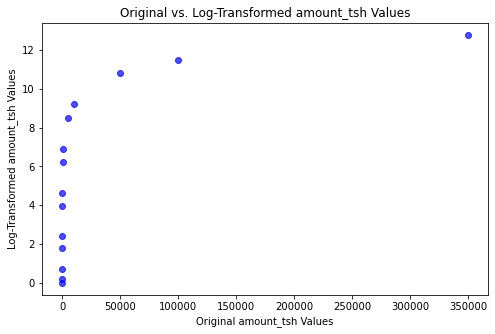

In [712]:
import numpy as np
import matplotlib.pyplot as plt

amount_tsh_values = np.array([0, 0.2, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 350000])
log_amount_tsh_values = np.log1p(amount_tsh_values)

plt.figure(figsize=(8,5))
plt.scatter(amount_tsh_values, log_amount_tsh_values, alpha=0.7, color='blue')

plt.xlabel("Original amount_tsh Values")
plt.ylabel("Log-Transformed amount_tsh Values")
plt.title("Original vs. Log-Transformed amount_tsh Values")
plt.show()


In [713]:
#columns: amount_tsh, quantity, source,population,disctrict
#quantity = {'insufficient': 2, 'enough': 4, 'seasonal': 3, 'dry': 1}
#full_df['quantity'] = full_df['quantity'].replace(quantity)
#full_df.head()



In [714]:
full_df = full_df.drop(columns=['population','log_population'])
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,Roman,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,1.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,NaN,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,Nyumba ya mungu pipe scheme,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,1.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,NaN,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,0.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,NaN,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1.0


In [715]:
full_df = full_df.dropna()
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,Roman,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,1.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,Nyumba ya mungu pipe scheme,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,1.0
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Moa/Mwereme,...,Zingibali,2009,submersible,vwc,per bucket,salty,enough,other,communal standpipe,1.0
13,50495,0.0,2013-03-15,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Pangani,Omarini,...,BL Bondeni,2009,gravity,water board,monthly,soft,enough,spring,communal standpipe,1.0
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Internal,Mwabasabi,...,None,0,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,1.0


In [716]:
full_df['year'] = pd.to_datetime(full_df['date_recorded']).dt.year
full_df = full_df[['id', 'amount_tsh', 'date_recorded', 'year', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'construction_year', 'extraction_type', 'management', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type_group', 'status_group']]
full_df.head()

,id,amount_tsh,date_recorded,year,funder,gps_height,installer,longitude,latitude,basin,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,2011,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,Roman,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,1.0
2,34310,25.0,2013-02-25,2013,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,Nyumba ya mungu pipe scheme,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,1.0
5,9944,20.0,2011-03-13,2011,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,...,Zingibali,2009,submersible,vwc,per bucket,salty,enough,other,communal standpipe,1.0
13,50495,0.0,2013-03-15,2013,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Pangani,...,BL Bondeni,2009,gravity,water board,monthly,soft,enough,spring,communal standpipe,1.0
14,53752,0.0,2012-10-20,2012,Biore,0,WEDECO,34.364073,-3.629333,Internal,...,None,0,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,1.0


In [717]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), non_numeric_cols)
], remainder='passthrough') 

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test) 


In [718]:
overlap = set(X_train.index) & set(X_test.index)
print(f"Number of overlapping samples: {len(overlap)}")


Number of overlapping samples: 0


In [719]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')


X_train_encoded = onehot_encoder.fit_transform(X_train)
X_test_encoded = onehot_encoder.transform(X_test)

print(f"X_train_encoded shape: {X_train_encoded.shape}")
print(f"X_test_encoded shape: {X_test_encoded.shape}")

X_train_encoded shape: (22320, 82626)
X_test_encoded shape: (5581, 82626)


In [720]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
object_cols = full_df.select_dtypes(include=['object']).columns

for col in object_cols:
    full_df[col] = label_encoder.fit_transform(full_df[col])


full_df.head()

,id,amount_tsh,date_recorded,year,funder,gps_height,installer,longitude,latitude,basin,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,6000.0,37,2011,623,1390,643,34.938093,-9.856322,1,...,2155,1999,3,6,0,6,1,8,1,1.0
2,34310,25.0,249,2013,403,686,857,37.460664,-3.821329,5,...,2041,2009,3,6,5,6,1,0,1,1.0
5,9944,20.0,36,2011,470,0,175,39.172796,-4.765587,5,...,2512,2009,13,6,5,4,1,4,1,1.0
13,50495,0.0,267,2013,381,1368,423,37.092574,-3.181783,5,...,26,2009,3,8,1,6,1,8,1,1.0
14,53752,0.0,163,2012,55,0,808,34.364073,-3.629333,0,...,1948,0,8,10,2,6,1,7,3,1.0


In [721]:
full_df['gps_height'] = full_df.mean(axis=1)
full_df['amount_tsh'] = full_df.mean(axis=1)
full_df


,id,amount_tsh,date_recorded,year,funder,gps_height,installer,longitude,latitude,basin,...,scheme_name,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
0,69572,3202.773428,37,2011,623,3142.347647,643,34.938093,-9.856322,1,...,2155,1999,3,6,0,6,1,8,1,1.0
2,34310,1690.790939,249,2013,403,1657.297908,857,37.460664,-3.821329,5,...,2041,2009,3,6,5,6,1,0,1,1.0
5,9944,851.179805,36,2011,470,822.807145,175,39.172796,-4.765587,5,...,2512,2009,13,6,5,4,1,4,1,1.0
13,50495,2305.452228,267,2013,381,2274.203820,423,37.092574,-3.181783,5,...,26,2009,3,8,1,6,1,8,1,1.0
14,53752,2362.463784,163,2012,55,2283.714991,808,34.364073,-3.629333,0,...,1948,0,8,10,2,6,1,7,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59381,67885,2873.506116,39,2011,470,2777.722579,175,38.835001,-4.880204,5,...,1136,1992,3,6,2,6,2,8,1,0.0
59382,47002,2210.198496,294,2013,92,2182.625212,175,37.454759,-3.323599,5,...,836,2008,3,8,5,6,1,8,1,0.0
59391,44885,1977.601850,294,2013,227,1929.681788,260,38.044070,-4.272218,5,...,387,1967,3,6,2,6,1,6,1,0.0
59395,60739,2484.194386,287,2013,216,2441.721240,84,37.169807,-3.253847,5,...,1029,1999,3,8,5,6,1,8,1,1.0


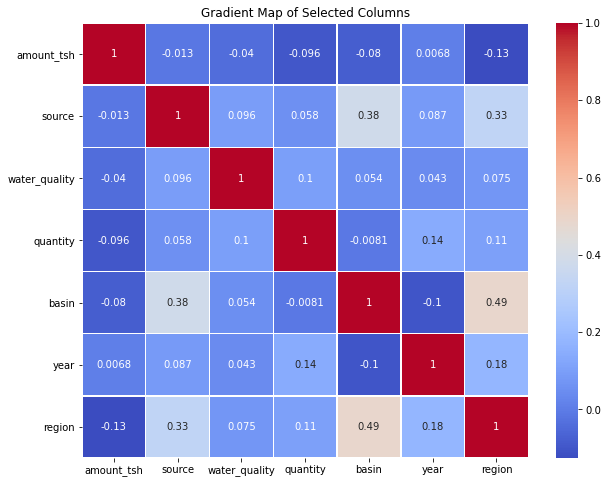

In [722]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['amount_tsh', 'source', 'water_quality', 'quantity', 'basin', 'year', 'region']
corr_matrix = X[columns].apply(lambda x: pd.factorize(x)[0]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Gradient Map of Selected Columns')
plt.show()

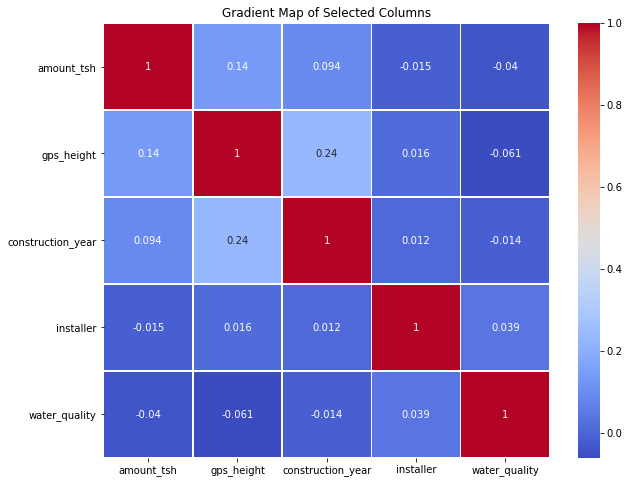

In [723]:
columns = ['amount_tsh', 'gps_height','construction_year','installer','water_quality']
corr_matrix = X[columns].apply(lambda x: pd.factorize(x)[0]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Gradient Map of Selected Columns')
plt.show()

closest corelation to amount_tsh seems to be region,basin,and source. 

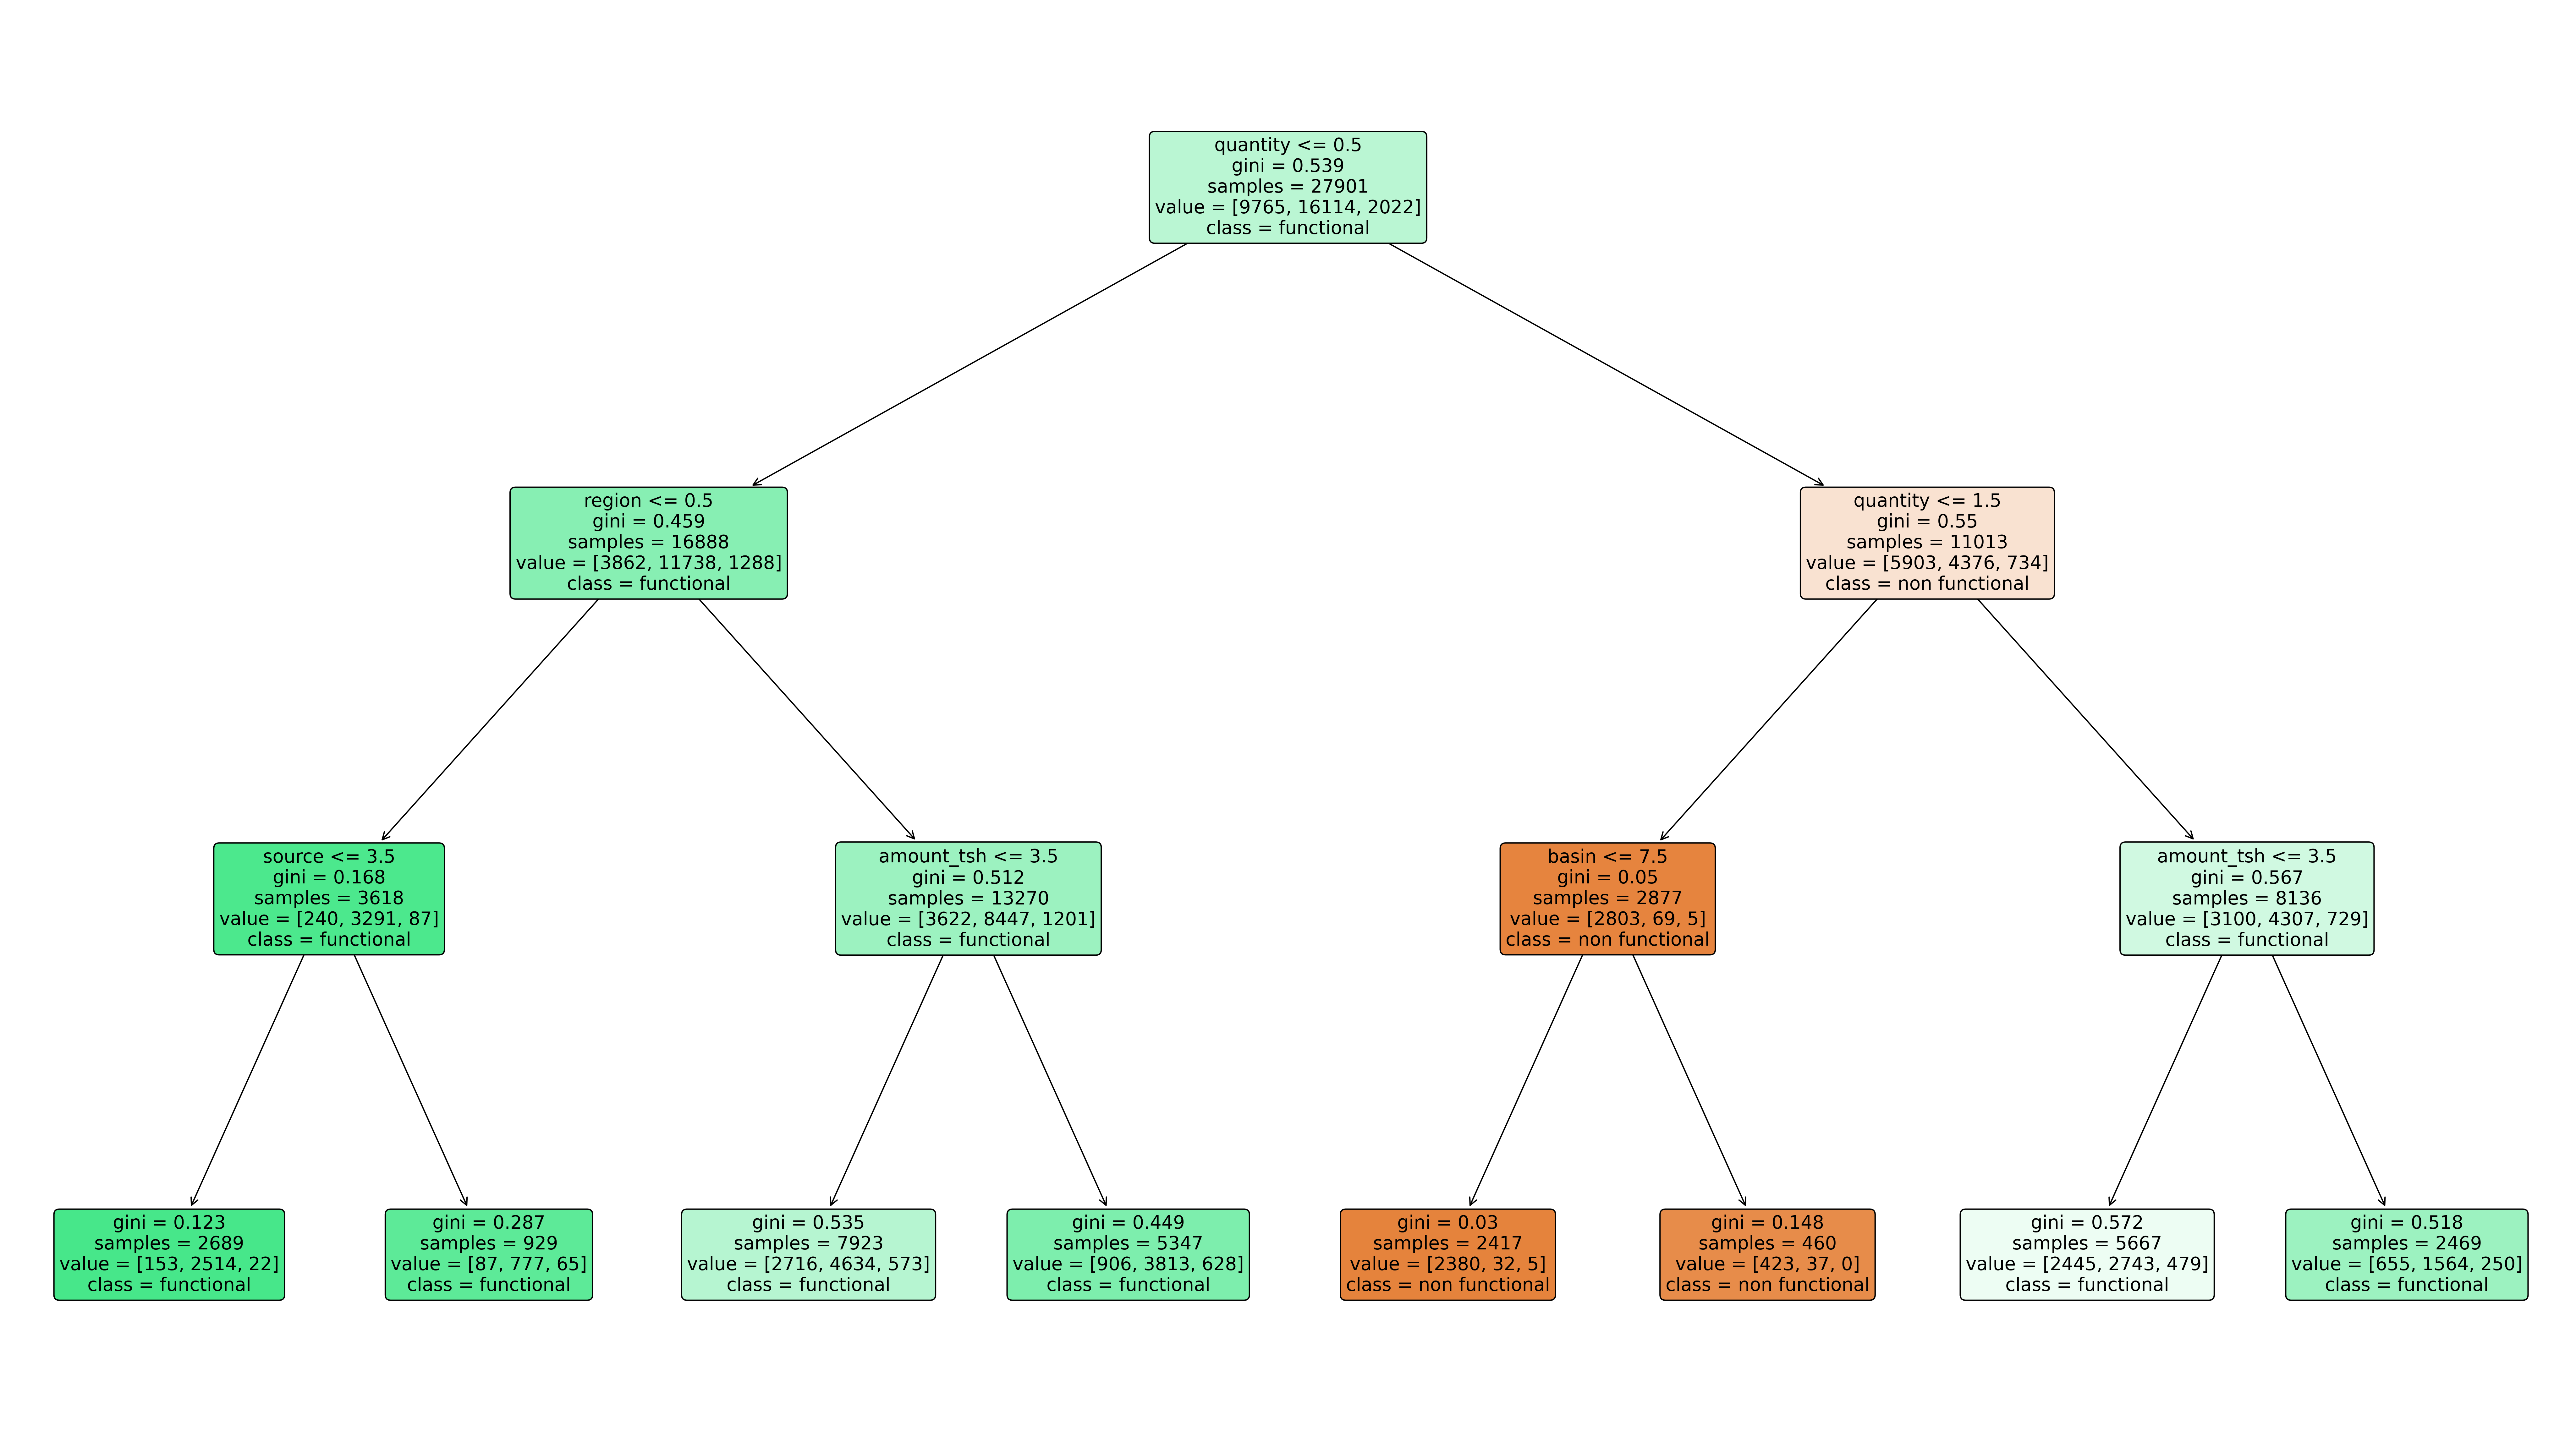

In [724]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

columns = ['amount_tsh', 'source', 'water_quality', 'quantity', 'basin', 'year', 'region']
X_tree = X[columns].apply(lambda x: pd.factorize(x)[0])
y_tree = y
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_tree, y_tree)

plt.figure(figsize=(35, 20), dpi=300)
plot_tree(tree_clf, feature_names=columns, class_names=['non functional', 'functional', 'functional needs repair'], 
          filled=True, rounded=True, fontsize=14)
plt.show()


In [725]:
categorical_cols = ['source', 'water_quality', 'quantity', 'basin', 'region']
numerical_cols = ['amount_tsh', 'year']

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = onehot_encoder.fit_transform(X_train[categorical_cols])
X_test_cat = onehot_encoder.transform(X_test[categorical_cols])

X_train_num = X_train[numerical_cols].to_numpy()
X_test_num = X_test[numerical_cols].to_numpy()

X_train_encoded = np.hstack((X_train_num, X_train_cat))
X_test_encoded = np.hstack((X_test_num, X_test_cat))

tree_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=42)
tree_clf.fit(X_train_encoded, y_train)
y_train_pred = tree_clf.predict(X_train_encoded)
y_test_pred = tree_clf.predict(X_test_encoded)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6994
Test Accuracy: 0.6907


In [726]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train_encoded, y_train)

y_test_pred_rf = rf_clf.predict(X_test_encoded)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")


Random Forest Test Accuracy: 0.7271


In [727]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
forest_clf.fit(X_train_encoded, y_train)

y_train_pred_forest = forest_clf.predict(X_train_encoded)

y_test_pred_forest = forest_clf.predict(X_test_encoded)

train_accuracy_forest = accuracy_score(y_train, y_train_pred_forest)
test_accuracy_forest = accuracy_score(y_test, y_test_pred_forest)

print(f"Random Forest Training Accuracy: {train_accuracy_forest:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_forest:.4f}")

Random Forest Training Accuracy: 0.7425
Random Forest Test Accuracy: 0.7271


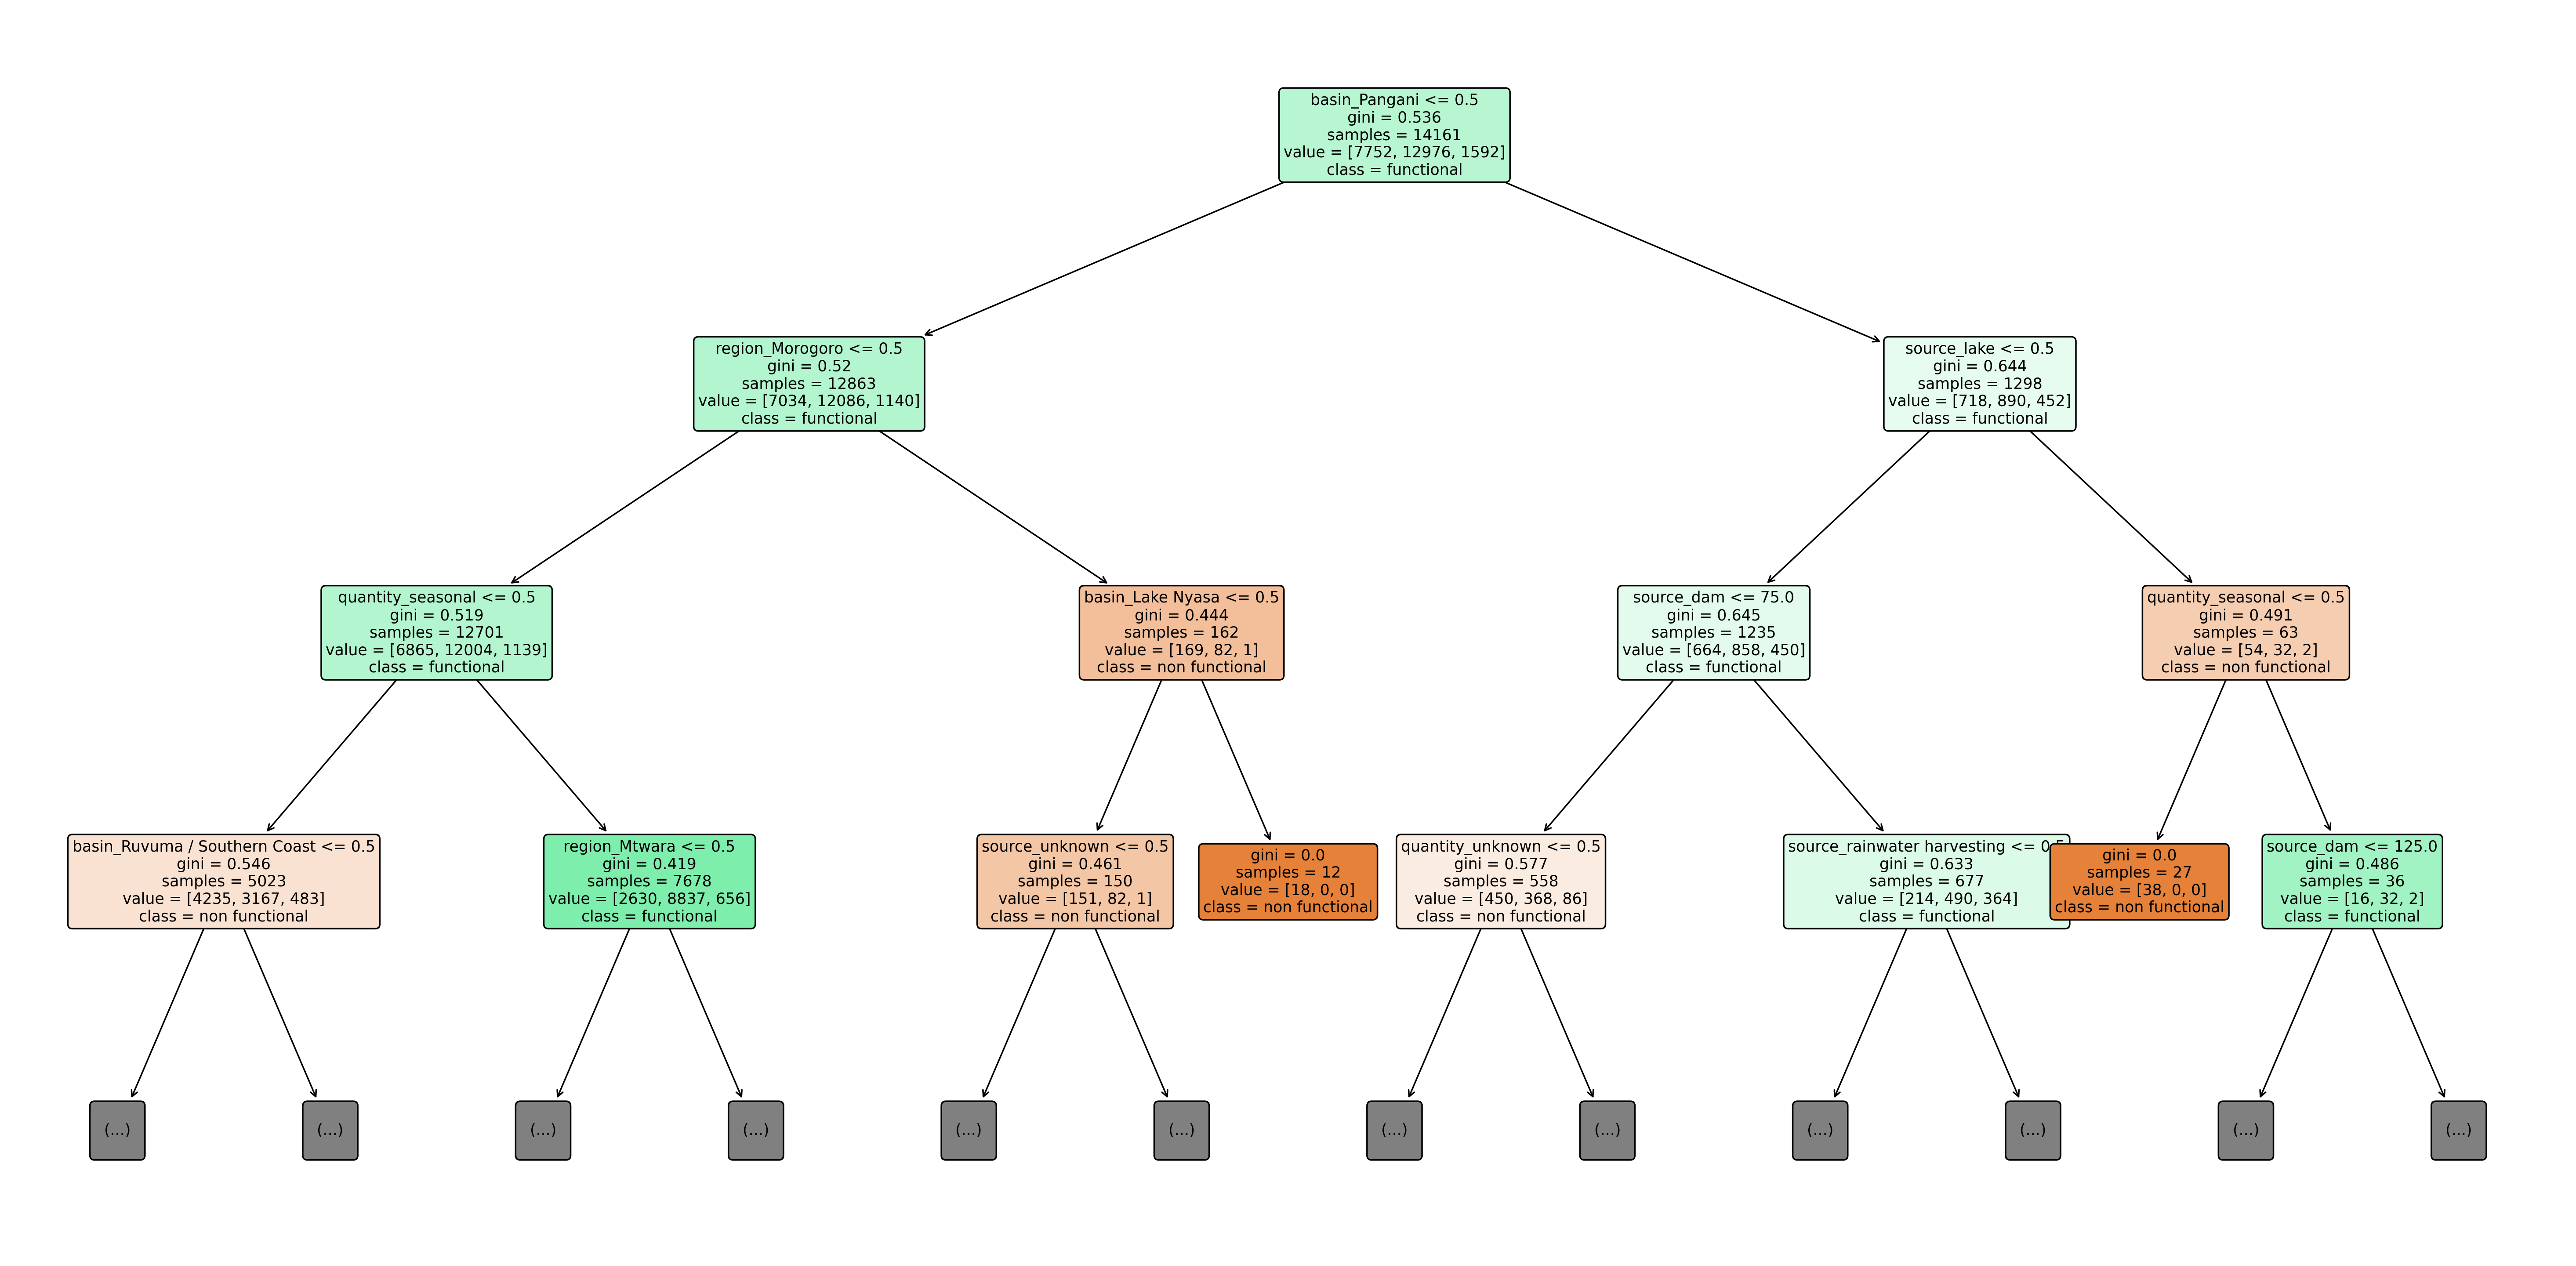

In [728]:
from sklearn.tree import plot_tree

tree_in_forest = forest_clf.estimators_[0]
try:
    feature_names = list(onehot_encoder.get_feature_names_out(categorical_cols)) + numerical_cols
except AttributeError:
    feature_names = list(onehot_encoder.get_feature_names(categorical_cols)) + numerical_cols

plt.figure(figsize=(30, 15), dpi=250)
plot_tree(
    tree_in_forest, 
    feature_names=feature_names,
    class_names=['non functional', 'functional', 'functional needs repair'], 
    filled=True, 
    rounded=True, 
    fontsize=10,max_depth = 3)

plt.show()


Green Nodes: These indicate functional pumps
Orange Nodes: Represent non-functional pumps
Lighter Colors: These nodes contain more mixed classifications


In [729]:
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['funder', 'installer', 'basin', 'subvillage', 'region', 'lga', 'ward',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'extraction_type', 'management', 'payment_type', 'water_quality',
       'quantity', 'source', 'waterpoint_type_group'],
      dtype='object')


In [730]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), non_numeric_cols)
], remainder='passthrough') 


X_transformed = preprocessor.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed)


In [731]:
overlap = set(X_train.index) & set(X_test.index)
print(f"Number of overlapping samples: {len(overlap)}")

tree_in_forest_train_indices = set(tree_in_forest.apply(X_train_encoded))
tree_in_forest_test_indices = set(tree_in_forest.apply(X_test_encoded))

data_leakage = tree_in_forest_test_indices & tree_in_forest_train_indices
print(f"Number of overlapping samples used in training and testing: {len(data_leakage)}")

Number of overlapping samples: 0
Number of overlapping samples used in training and testing: 144


In [732]:
print(X.columns.intersection(y_test_pred_forest))


Index([], dtype='object')
